In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_01 = pd.read_csv("data_preprocessed\\01_application_train.csv")
df_02 = pd.read_csv("data_preprocessed\\02_previous_application.csv")
df_03 = pd.read_csv("data_preprocessed\\03-04_bureau_balance_merge_bureau.csv")
df_05 = pd.read_csv("data_preprocessed\\05_pos_cash_balance.csv")
df_06 = pd.read_csv("data_preprocessed\\06_instalment_payment.csv")
df_07 = pd.read_csv("data_preprocessed\\07_credit_cash_balance.csv")

In [3]:
df_01

,SK_ID_CURR,TARGET,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGE
0,100002,1,M,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,0.018801,Laborers,1.0,Business Entity Type 3,0.083037,0.262949,0.139376,25.920548
1,100003,0,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,0.003541,Core staff,2.0,School,0.311267,0.622246,NaN,45.931507
2,100004,0,M,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,0.010032,Laborers,1.0,Government,NaN,0.555912,0.729567,52.180822
3,100006,0,F,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,0.008019,Laborers,2.0,Business Entity Type 3,NaN,0.650442,NaN,52.068493
4,100007,0,M,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,0.028663,Core staff,1.0,Religion,NaN,0.322738,NaN,54.608219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0,M,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,0.032561,Sales staff,1.0,Services,0.145570,0.681632,NaN,25.553425
307503,456252,0,F,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,0.025164,Unknown,1.0,XNA,NaN,0.115992,NaN,56.917808
307504,456253,0,F,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,0.005002,Managers,1.0,School,0.744026,0.535722,0.218859,41.002740
307505,456254,1,F,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,0.005313,Laborers,2.0,Business Entity Type 1,NaN,0.514163,0.661024,32.769863


In [4]:
df_02

,SK_ID_CURR,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_SUM,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_SUM,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_CREDIT_MEAN,...,PREV_AMT_GOODS_PRICE_MAX,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_IS_APPROVED_FLAG_COUNT,PREV_IS_REFUSED_FLAG_COUNT,PREV_IS_CONS_LOAN_FLAG_COUNT,PREV_IS_CASH_LOAN_FLAG_COUNT,PREV_IS_REVOL_LOAN_FLAG_COUNT,PREV_IS_POS_PORTFOLIO_FLAG_COUNT_COUNT,PREV_IS_CASH_PORTFOLIO_FLAG_COUNT_COUNT
0,100001,3951.000000,3951.000,3951.000,3951.000,24835.500,24835.5,24835.5,24835.5,23787.00,...,24835.5,8.00,8.0,1,1,1,1,1,1,1
1,100002,9251.775000,9251.775,9251.775,9251.775,179055.000,179055.0,179055.0,179055.0,179055.00,...,179055.0,24.00,24.0,1,1,1,1,1,1,1
2,100003,56553.990000,169661.970,6737.310,98356.995,435436.500,1306309.5,68809.5,900000.0,484191.00,...,900000.0,10.00,30.0,3,3,3,3,3,3,3
3,100004,5357.250000,5357.250,5357.250,5357.250,24282.000,24282.0,24282.0,24282.0,20106.00,...,24282.0,4.00,4.0,1,1,1,1,1,1,1
4,100005,4813.200000,4813.200,4813.200,4813.200,22308.750,44617.5,0.0,44617.5,20076.75,...,44617.5,12.00,12.0,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,6605.910000,6605.910,6605.910,6605.910,40455.000,40455.0,40455.0,40455.0,40455.00,...,40455.0,8.00,8.0,1,1,1,1,1,1,1
338853,456252,10074.465000,10074.465,10074.465,10074.465,57595.500,57595.5,57595.5,57595.5,56821.50,...,57595.5,6.00,6.0,1,1,1,1,1,1,1
338854,456253,4770.405000,9540.810,3973.095,5567.715,24162.750,48325.5,19413.0,28912.5,20625.75,...,28912.5,5.00,10.0,2,2,2,2,2,2,2
338855,456254,10681.132500,21362.265,2296.440,19065.825,121317.750,242635.5,18846.0,223789.5,134439.75,...,223789.5,15.00,30.0,2,2,2,2,2,2,2


In [5]:
df_03

,SK_ID_CURR,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_CREDIT_DAY_OVERDUE,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_CNT_CREDIT_PROLONG,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,BUR_MEAN_DEBT_CREDIT_RATIO,BUR_MEAN_OVERDUE,BUR_MEAN_PAST_LOAN_COUNT,BUR_MEAN_CREDIT_TYPE_COUNT,BUR_MEAN_ACTIVE_LOANS_PERCENTAGE,BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE
0,100001,-735.000000,0.0,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,41.055516,1.0,7.0,1.0,42.857143,-11.785714
1,100002,-874.000000,0.0,1681.029,0.000000,1.081319e+05,30722.625000,7997.14125,0.0,28.412163,1.0,8.0,2.0,25.000000,-21.875000
2,100003,-1400.750000,0.0,0.000,0.000000,2.543501e+05,0.000000,202500.00000,0.0,NaN,1.0,4.0,2.0,25.000000,NaN
3,100004,-867.000000,0.0,0.000,0.000000,9.451890e+04,0.000000,0.00000,0.0,NaN,1.0,2.0,1.0,0.000000,NaN
4,100005,-190.666667,0.0,0.000,0.000000,2.190420e+05,189469.500000,0.00000,0.0,86.499165,1.0,3.0,2.0,66.666667,-3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,-1667.076923,0.0,6147.000,0.000000,2.841430e+05,12543.923077,0.00000,0.0,4.414652,1.0,13.0,3.0,15.384615,NaN
305807,456250,-862.000000,0.0,0.000,0.000000,1.028820e+06,744013.365000,19422.79500,0.0,72.317167,1.0,3.0,2.0,66.666667,-14.000000
305808,456253,-867.500000,0.0,NaN,0.000000,9.900000e+05,448958.250000,0.00000,0.0,45.349318,1.0,4.0,2.0,50.000000,-14.125000
305809,456254,-1104.000000,0.0,NaN,0.000000,4.500000e+04,0.000000,NaN,0.0,NaN,1.0,1.0,1.0,0.000000,-18.000000


In [6]:
df_05

,SK_ID_CURR,POS_BL_COMPLETE_COUNT,POS_BL_OVERDUE_COUNT,POS_BAL_MONTHS_BALANCE_MIN,POS_BAL_MONTHS_BALANCE_MAX,POS_BAL_MONTHS_BALANCE_MEAN,POS_BAL_MONTHS_BALANCE_STD,POS_BAL_CNT_INSTALMENT_MIN,POS_BAL_CNT_INSTALMENT_MAX,POS_BAL_CNT_INSTALMENT_MEAN,...,POS_BAL_CNT_INSTALMENT_FUTURE_MEAN,POS_BAL_CNT_INSTALMENT_FUTURE_STD,POS_BAL_SK_DPD_MIN,POS_BAL_SK_DPD_MAX,POS_BAL_SK_DPD_MEAN,POS_BAL_SK_DPD_STD,POS_BAL_SK_DPD_DEF_MIN,POS_BAL_SK_DPD_DEF_MAX,POS_BAL_SK_DPD_DEF_MEAN,POS_BAL_SK_DPD_DEF_STD
0,100001,2,0,-96,-53,-72.555556,20.863312,4.0,4.0,4.000000,...,1.444444,1.424001,0,7,0.777778,2.333333,0,7,0.777778,2.333333
1,100002,0,0,-19,-1,-10.000000,5.627314,24.0,24.0,24.000000,...,15.000000,5.627314,0,0,0.000000,0.000000,0,0,0.000000,0.000000
2,100003,2,0,-77,-18,-43.785714,24.640162,6.0,12.0,10.107143,...,5.785714,3.842811,0,0,0.000000,0.000000,0,0,0.000000,0.000000
3,100004,1,0,-27,-24,-25.500000,1.290994,3.0,4.0,3.750000,...,2.250000,1.707825,0,0,0.000000,0.000000,0,0,0.000000,0.000000
4,100005,1,0,-25,-15,-20.000000,3.316625,9.0,12.0,11.700000,...,7.200000,3.614784,0,0,0.000000,0.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337247,456251,1,0,-9,-1,-5.000000,2.738613,7.0,8.0,7.875000,...,4.375000,2.669270,0,0,0.000000,0.000000,0,0,0.000000,0.000000
337248,456252,1,0,-82,-76,-79.000000,2.160247,6.0,6.0,6.000000,...,3.000000,2.160247,0,0,0.000000,0.000000,0,0,0.000000,0.000000
337249,456253,2,0,-96,-57,-79.235294,16.723970,4.0,12.0,6.705882,...,2.000000,1.903943,0,5,0.294118,1.212678,0,5,0.294118,1.212678
337250,456254,0,0,-11,-1,-5.550000,3.034451,14.0,16.0,14.900000,...,10.350000,3.360373,0,0,0.000000,0.000000,0,0,0.000000,0.000000


In [7]:
df_06

,SK_ID_CURR,INS_BAL_ON_TIME_SUM_FIRST,INS_BAL_INS_COUNT_FIRST,INS_BAL_INSTALMENT_SUM_FIRST,INS_BAL_PAYMENT_SUM_FIRST,INS_BAL_DPD_SUM,INS_BAL_DPD_MEAN,INS_BAL_TIME_SPAN_SUM,INS_BAL_TIME_SPAN_MEAN,INS_BAL_ON_TIME_PERCENT_,INS_BAL_PAYMENT_RATIO_,INS_BAL_INS_ON_TIME_GRADE_,INS_BAL_PAYMENT_GRADE_
0,100002,19,19,219625.695,219625.695,0.0,0.000000,10260.0,540.000000,1.000000,1.000000,Good,Good
1,100003,25,25,1618864.650,1618864.650,0.0,0.000000,6120.0,244.800000,1.000000,1.000000,Good,Good
2,100004,3,3,21288.465,21288.465,0.0,0.000000,180.0,60.000000,1.000000,1.000000,Good,Good
3,100006,16,16,1007153.415,1007153.415,0.0,0.000000,3300.0,206.250000,1.000000,1.000000,Good,Good
4,100007,50,66,835985.340,806127.975,63.0,0.954545,23730.0,359.545455,0.757576,0.964285,Sub_Par,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,7,7,52450.470,52450.470,0.0,0.000000,1260.0,180.000000,1.000000,1.000000,Good,Good
307507,456252,5,6,60419.205,60419.205,3.0,0.500000,900.0,150.000000,0.833333,1.000000,Par,Good
307508,456253,13,14,61595.910,57622.815,9.0,0.642857,1530.0,109.285714,0.928571,0.935497,Good,Good
307509,456254,19,19,194556.825,194556.825,0.0,0.000000,4860.0,255.789474,1.000000,1.000000,Good,Good


In [8]:
df_07

,SK_ID_CURR,CC_BAL_MONTHS_BALANCE_MAX,CC_BAL_AMT_BALANCE_SUM,CC_BAL_AMT_BALANCE_MEAN,CC_BAL_AMT_BALANCE_MAX,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_SUM,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MAX,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_SUM,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_MAX,...,CC_BAL_CNT_INSTALMENT_MATURE_CUM_SUM,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MAX,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MIN,CC_BAL_SK_DPD_SUM,CC_BAL_SK_DPD_MAX,CC_BAL_SK_DPD_DEF_SUM,CC_BAL_SK_DPD_DEF_MAX,CC_BAL_AMT_DRAWING_SUM_SUM,CC_BAL_CNT_DRAWING_SUM_SUM,CC_BAL_COMPLETE_CNT_FIRST
0,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,-1.0,0.0,0.0,0.0,1620000.0,270000.0,270000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_merged_final = pd.merge(df_01, df_02, how = 'left', on=['SK_ID_CURR'])
df_merged_final = pd.merge(df_merged_final, df_03, how = 'left', on=['SK_ID_CURR'])
df_merged_final = pd.merge(df_merged_final, df_05, how = 'left', on=['SK_ID_CURR'])
df_merged_final = pd.merge(df_merged_final, df_06, how = 'left', on=['SK_ID_CURR'])
df_merged_final = pd.merge(df_merged_final, df_07, how = 'left', on=['SK_ID_CURR'])
df_merged_final

,SK_ID_CURR,TARGET,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,CC_BAL_CNT_INSTALMENT_MATURE_CUM_SUM,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MAX,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MIN,CC_BAL_SK_DPD_SUM,CC_BAL_SK_DPD_MAX,CC_BAL_SK_DPD_DEF_SUM,CC_BAL_SK_DPD_DEF_MAX,CC_BAL_AMT_DRAWING_SUM_SUM,CC_BAL_CNT_DRAWING_SUM_SUM,CC_BAL_COMPLETE_CNT_FIRST
0,100002,1,M,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,M,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,F,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,M,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0,M,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307503,456252,0,F,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307504,456253,0,F,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307505,456254,1,F,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
## check null
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(df_merged_final)
null_df

,Feature,Percentage
0,BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE,70.006862
1,EXT_SOURCE_1,56.381156
2,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,40.202337
3,BUR_MEAN_DEBT_CREDIT_RATIO,39.786086
4,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,21.160169
...,...,...
65,INS_BAL_PAYMENT_RATIO_,5.160208
66,EXT_SOURCE_2,0.214629
67,AMT_GOODS_PRICE,0.090404
68,AMT_ANNUITY,0.003902


In [11]:
drop_null_col =null_df[null_df["Percentage"] > 70]["Feature"].tolist()
drop_null_col

['BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE']

In [12]:
df_merged_final.drop(drop_null_col, axis=1, inplace= True)

In [13]:
df_merged_final.shape

(307507, 142)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

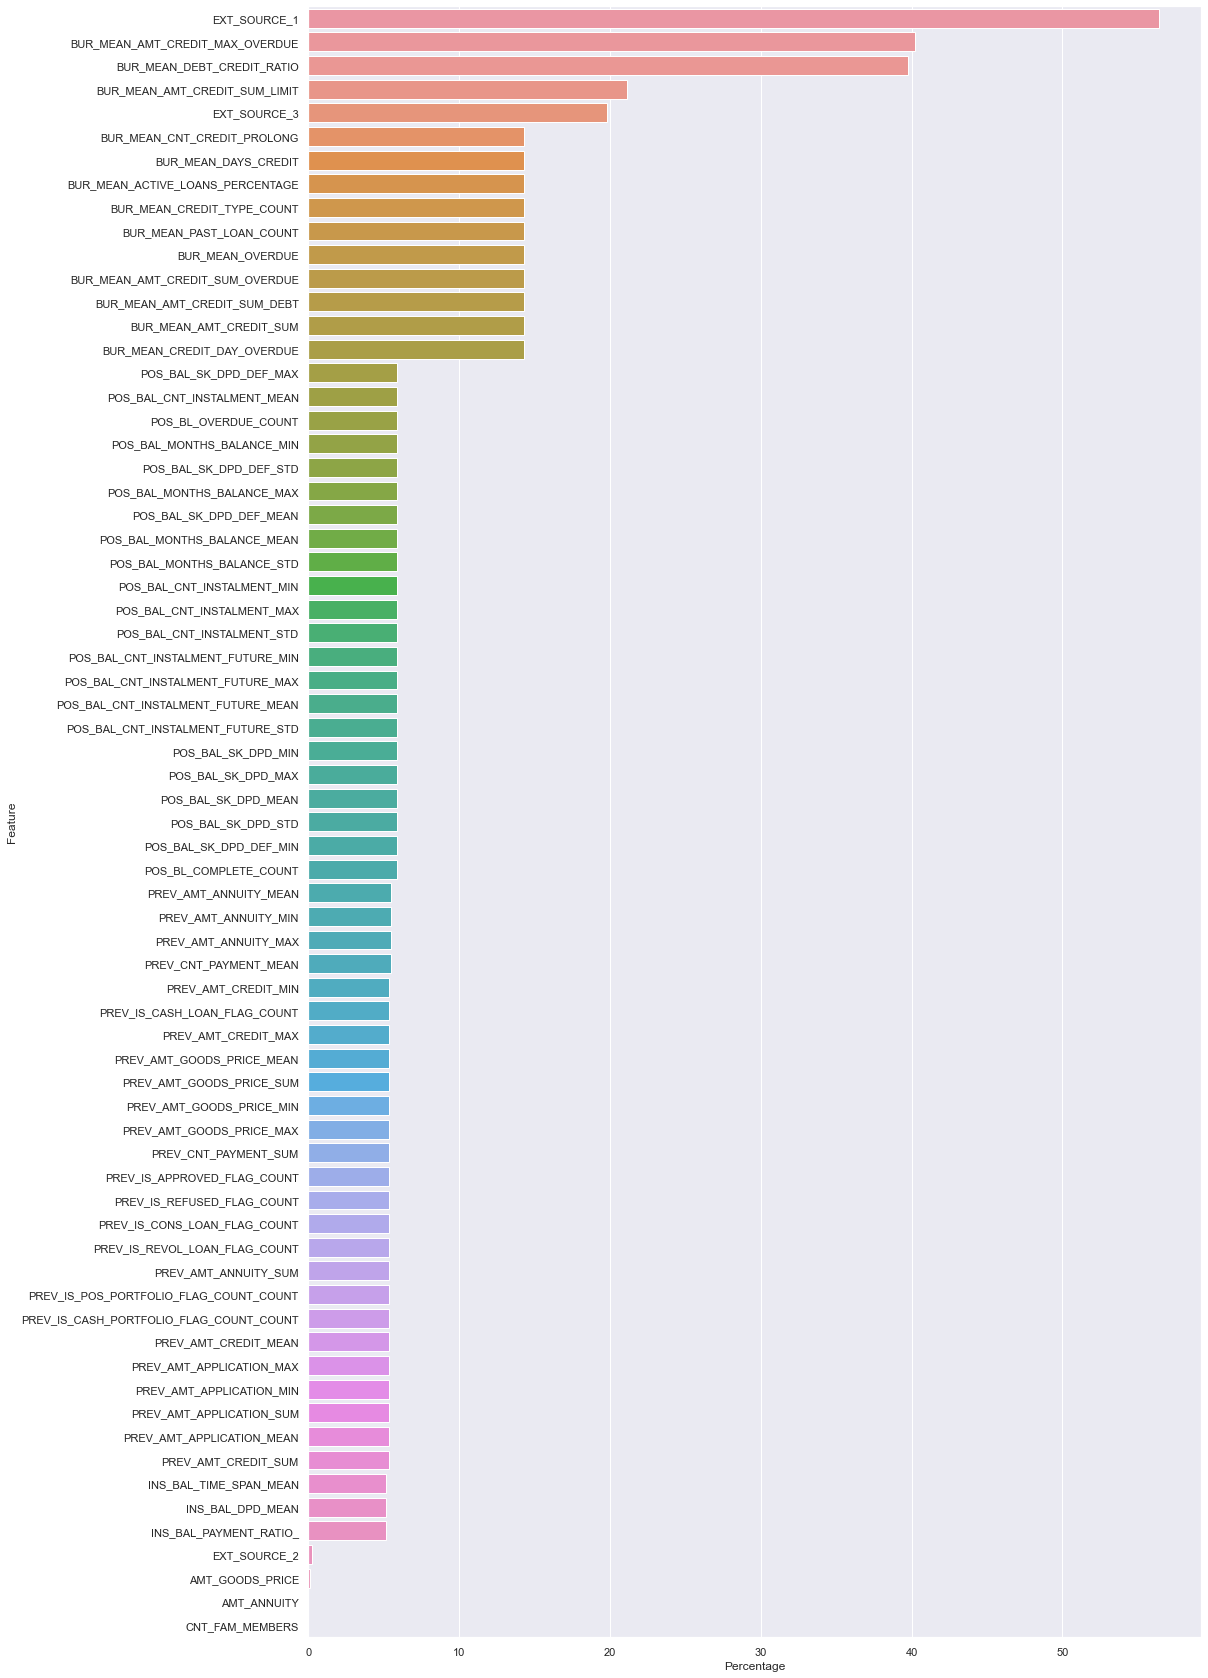

In [14]:
null_df = check_missed_values(df_merged_final)
plt.figure(figsize=(16,30))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

## drop những cột chứa hầu hết giá trị 0

In [15]:
numeric_df = df_merged_final._get_numeric_data()
numeric_df.drop([ "SK_ID_CURR", "TARGET"], axis= 1, inplace= True)

count_list =[]
for i in numeric_df.columns:
    fre_count = pd.Series(numeric_df[i].value_counts(normalize= True))
    count_list.append([i, fre_count.index[0], fre_count.values[0] * 100])

frequent_df = pd.DataFrame(count_list)
frequent_df.columns = ["Feature", "Value", "Frequent"]
frequent_df = frequent_df.sort_values(by= "Frequent",ascending= False)
to_drop = frequent_df[frequent_df["Frequent"] > 75]["Feature"].tolist()
to_drop

['POS_BAL_SK_DPD_DEF_MIN',
 'POS_BAL_SK_DPD_MIN',
 'CC_BAL_AMT_INST_MIN_REGULARITY_MIN',
 'POS_BL_OVERDUE_COUNT',
 'CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MIN',
 'BUR_MEAN_AMT_CREDIT_SUM_OVERDUE',
 'BUR_MEAN_OVERDUE',
 'BUR_MEAN_CREDIT_DAY_OVERDUE',
 'CC_BAL_AMT_PAYMENT_CURRENT_MIN',
 'CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_SUM',
 'CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_MAX',
 'CC_BAL_CNT_DRAWINGS_OTHER_CURRENT_MAX',
 'CC_BAL_CNT_DRAWINGS_OTHER_CURRENT_SUM',
 'CC_BAL_CNT_INSTALMENT_MATURE_CUM_MIN',
 'BUR_MEAN_CNT_CREDIT_PROLONG',
 'CC_BAL_COMPLETE_CNT_FIRST',
 'CC_BAL_SK_DPD_DEF_MAX',
 'CC_BAL_SK_DPD_DEF_SUM',
 'CC_BAL_SK_DPD_SUM',
 'CC_BAL_SK_DPD_MAX',
 'POS_BAL_CNT_INSTALMENT_FUTURE_MIN',
 'CC_BAL_AMT_DRAWINGS_POS_CURRENT_MAX',
 'CC_BAL_CNT_DRAWINGS_POS_CURRENT_MAX',
 'CC_BAL_CNT_DRAWINGS_POS_CURRENT_SUM',
 'CC_BAL_AMT_DRAWINGS_POS_CURRENT_SUM',
 'POS_BAL_SK_DPD_DEF_MEAN',
 'POS_BAL_SK_DPD_DEF_MAX',
 'POS_BAL_SK_DPD_DEF_STD',
 'CC_BAL_CNT_DRAWINGS_ATM_CURRENT_SUM',
 'CC_BAL_AMT_DRAWINGS_ATM_CURRENT_

In [16]:
df_merged_final.drop(to_drop, axis=1, inplace= True)
df_merged_final

,SK_ID_CURR,TARGET,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,INS_BAL_TIME_SPAN_SUM,INS_BAL_TIME_SPAN_MEAN,INS_BAL_ON_TIME_PERCENT_,INS_BAL_PAYMENT_RATIO_,INS_BAL_INS_ON_TIME_GRADE_,INS_BAL_PAYMENT_GRADE_,CC_BAL_MONTHS_BALANCE_MAX,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_SUM,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MAX
0,100002,1,M,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,...,10260.0,540.000000,1.000000,1.000000,Good,Good,0.0,0.0,0.0,0.0
1,100003,0,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,...,6120.0,244.800000,1.000000,1.000000,Good,Good,0.0,0.0,0.0,0.0
2,100004,0,M,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,...,180.0,60.000000,1.000000,1.000000,Good,Good,0.0,0.0,0.0,0.0
3,100006,0,F,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,...,3300.0,206.250000,1.000000,1.000000,Good,Good,-1.0,1620000.0,270000.0,270000.0
4,100007,0,M,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,...,23730.0,359.545455,0.757576,0.964285,Sub_Par,Good,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0,M,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,...,1260.0,180.000000,1.000000,1.000000,Good,Good,0.0,0.0,0.0,0.0
307503,456252,0,F,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,...,900.0,150.000000,0.833333,1.000000,Par,Good,0.0,0.0,0.0,0.0
307504,456253,0,F,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,...,1530.0,109.285714,0.928571,0.935497,Good,Good,0.0,0.0,0.0,0.0
307505,456254,1,F,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,...,4860.0,255.789474,1.000000,1.000000,Good,Good,0.0,0.0,0.0,0.0


In [17]:
df_merged_final["CNT_FAM_MEMBERS"].fillna(df_merged_final["CNT_FAM_MEMBERS"].mode()[0] , inplace = True)
for i in ['BUR_MEAN_ACTIVE_LOANS_PERCENTAGE','BUR_MEAN_CREDIT_TYPE_COUNT','BUR_MEAN_PAST_LOAN_COUNT','BUR_MEAN_AMT_CREDIT_MAX_OVERDUE','BUR_MEAN_AMT_CREDIT_SUM_DEBT','BUR_MEAN_AMT_CREDIT_SUM','BUR_MEAN_DAYS_CREDIT']:
       df_merged_final[i].fillna(value=df_merged_final[i].median(),inplace=True)

df_merged_final.fillna(0, inplace= True)

In [18]:
null_df = check_missed_values(df_merged_final)
null_df

,Feature,Percentage


<AxesSubplot:>

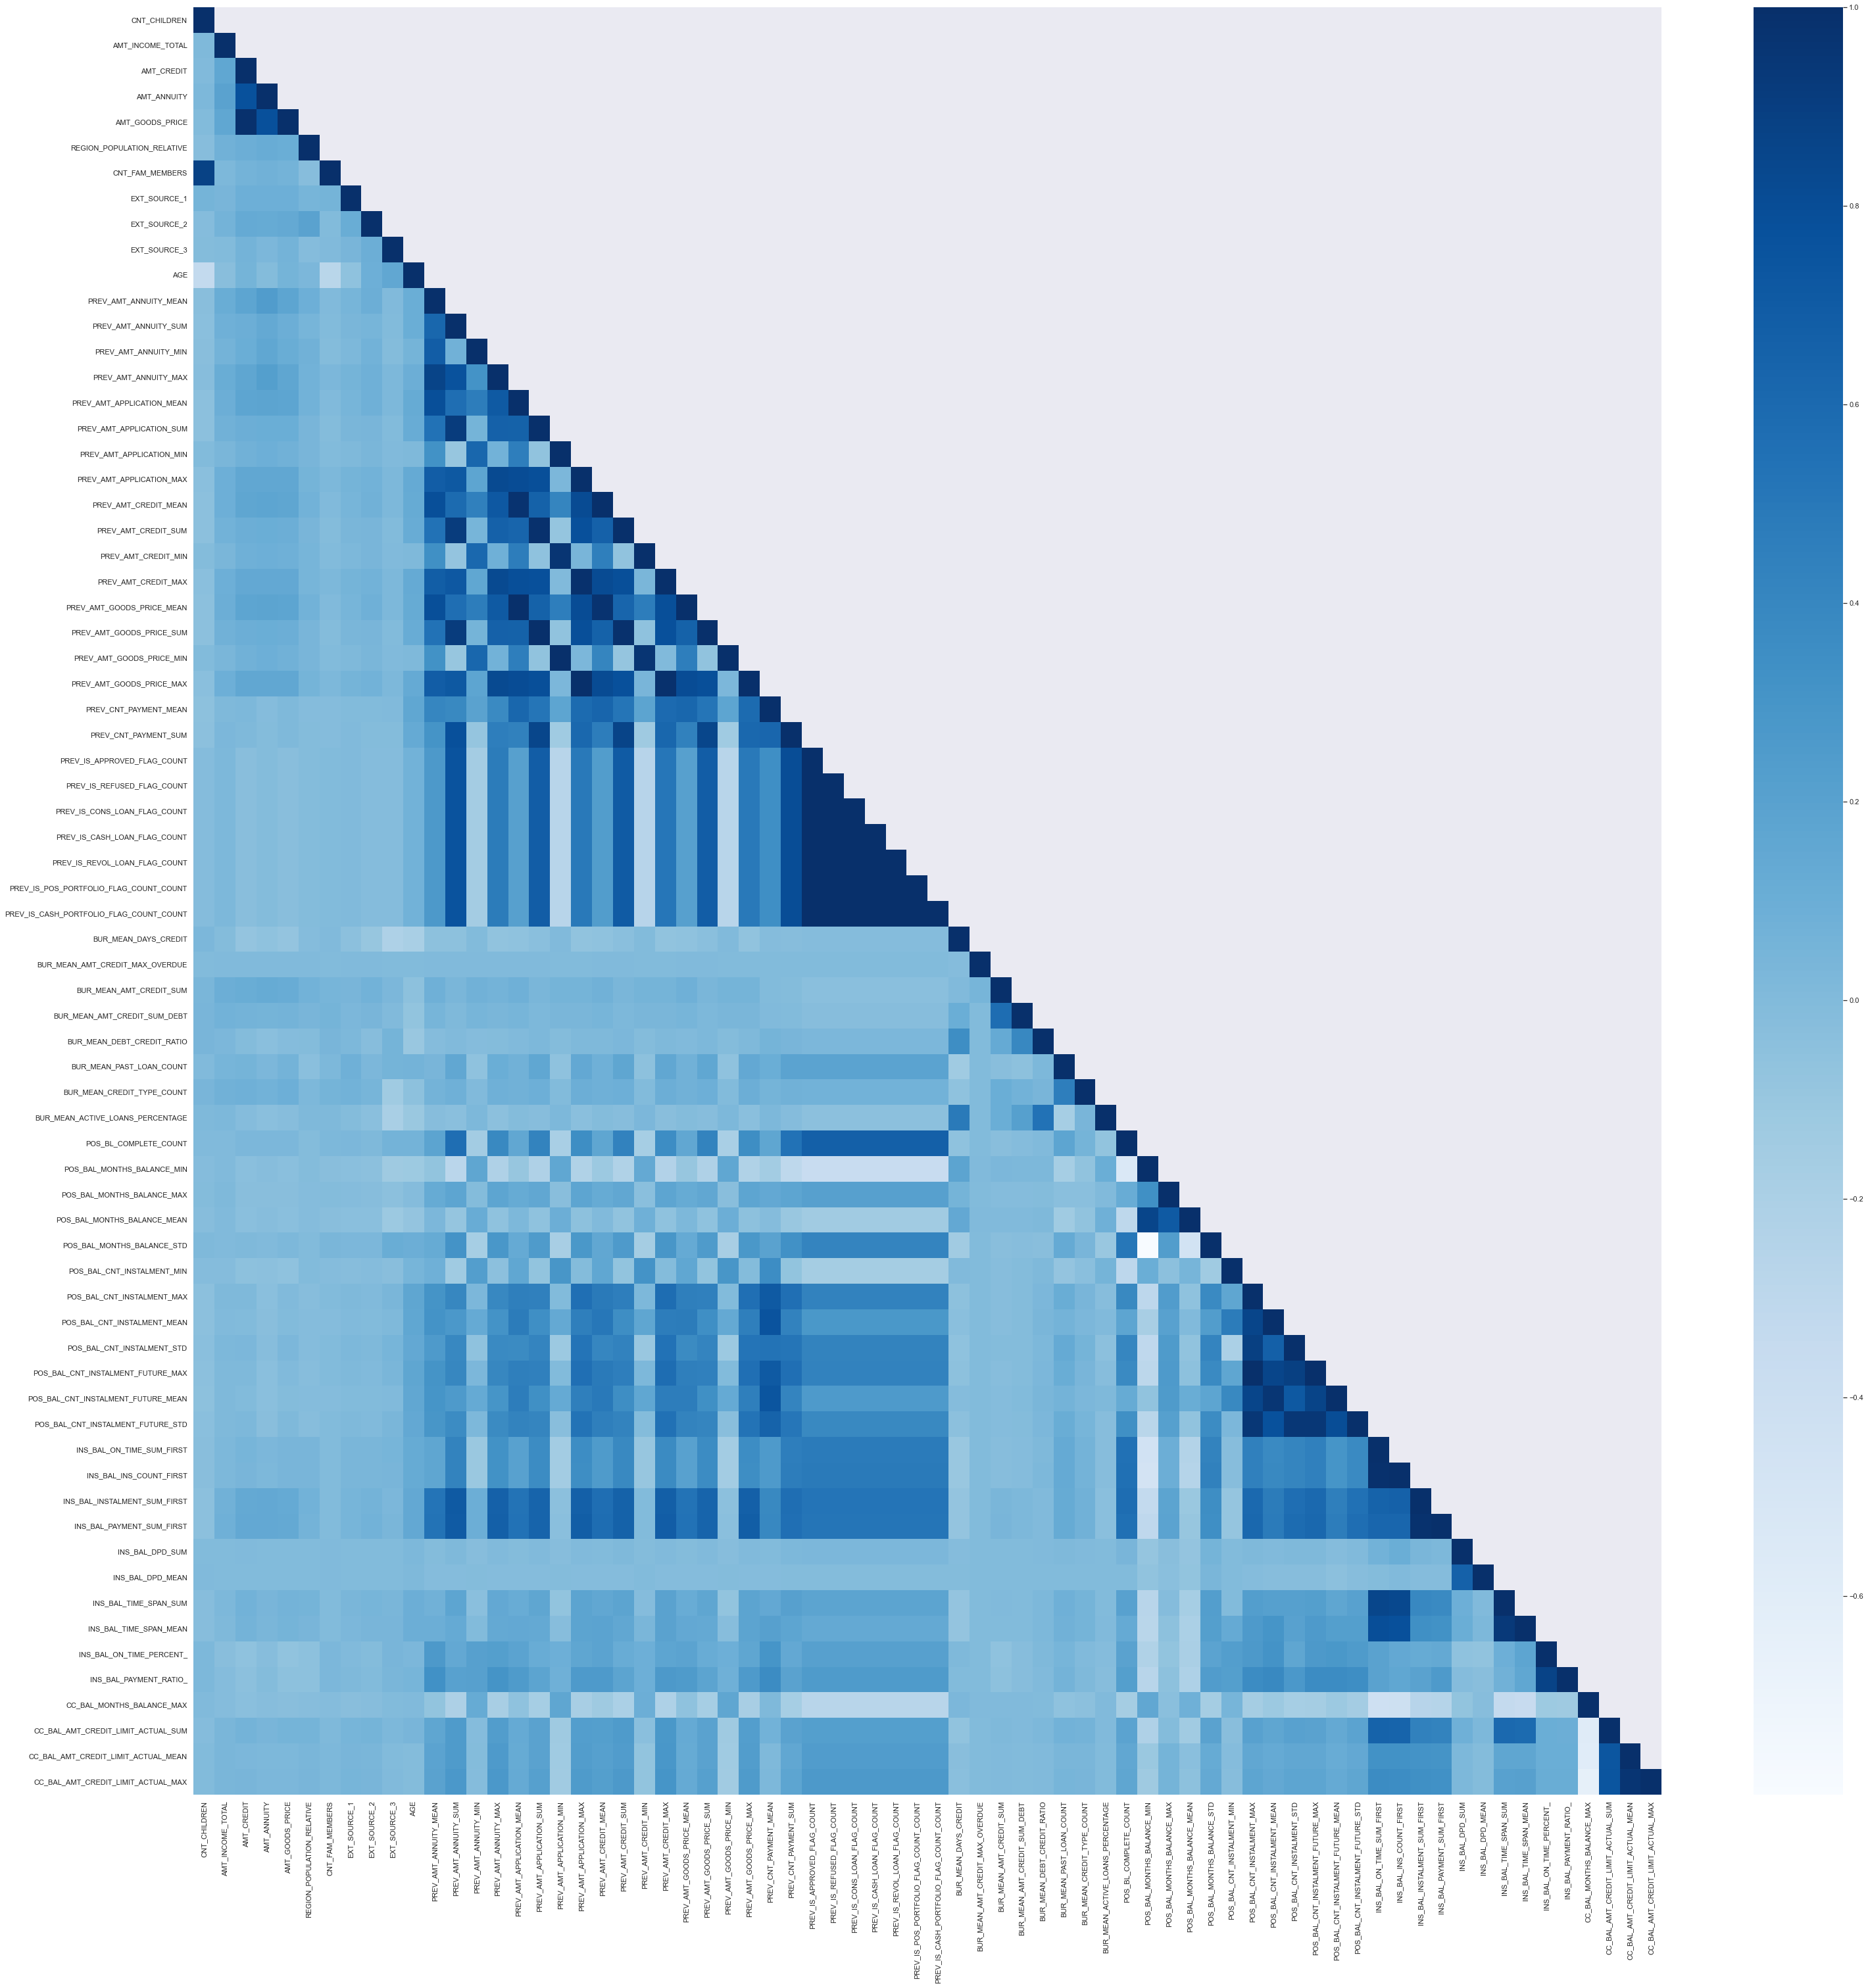

In [19]:
numeric_df = df_merged_final._get_numeric_data()
numeric_df.drop([ "SK_ID_CURR", "TARGET"], axis= 1, inplace= True)
corr = numeric_df.corr()
mask = np.zeros_like(corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(50,50))
sns.heatmap(corr, mask= mask, cmap= "Blues")

In [20]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
to_drop

['AMT_GOODS_PRICE',
 'PREV_AMT_APPLICATION_SUM',
 'PREV_AMT_CREDIT_MEAN',
 'PREV_AMT_CREDIT_SUM',
 'PREV_AMT_CREDIT_MIN',
 'PREV_AMT_CREDIT_MAX',
 'PREV_AMT_GOODS_PRICE_MEAN',
 'PREV_AMT_GOODS_PRICE_SUM',
 'PREV_AMT_GOODS_PRICE_MIN',
 'PREV_AMT_GOODS_PRICE_MAX',
 'PREV_IS_REFUSED_FLAG_COUNT',
 'PREV_IS_CONS_LOAN_FLAG_COUNT',
 'PREV_IS_CASH_LOAN_FLAG_COUNT',
 'PREV_IS_REVOL_LOAN_FLAG_COUNT',
 'PREV_IS_POS_PORTFOLIO_FLAG_COUNT_COUNT',
 'PREV_IS_CASH_PORTFOLIO_FLAG_COUNT_COUNT',
 'POS_BAL_CNT_INSTALMENT_FUTURE_MAX',
 'POS_BAL_CNT_INSTALMENT_FUTURE_MEAN',
 'POS_BAL_CNT_INSTALMENT_FUTURE_STD',
 'INS_BAL_INS_COUNT_FIRST',
 'INS_BAL_PAYMENT_SUM_FIRST',
 'INS_BAL_TIME_SPAN_MEAN',
 'CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MAX']

In [21]:
df_merged_final.drop(to_drop, axis=1, inplace= True)

<AxesSubplot:>

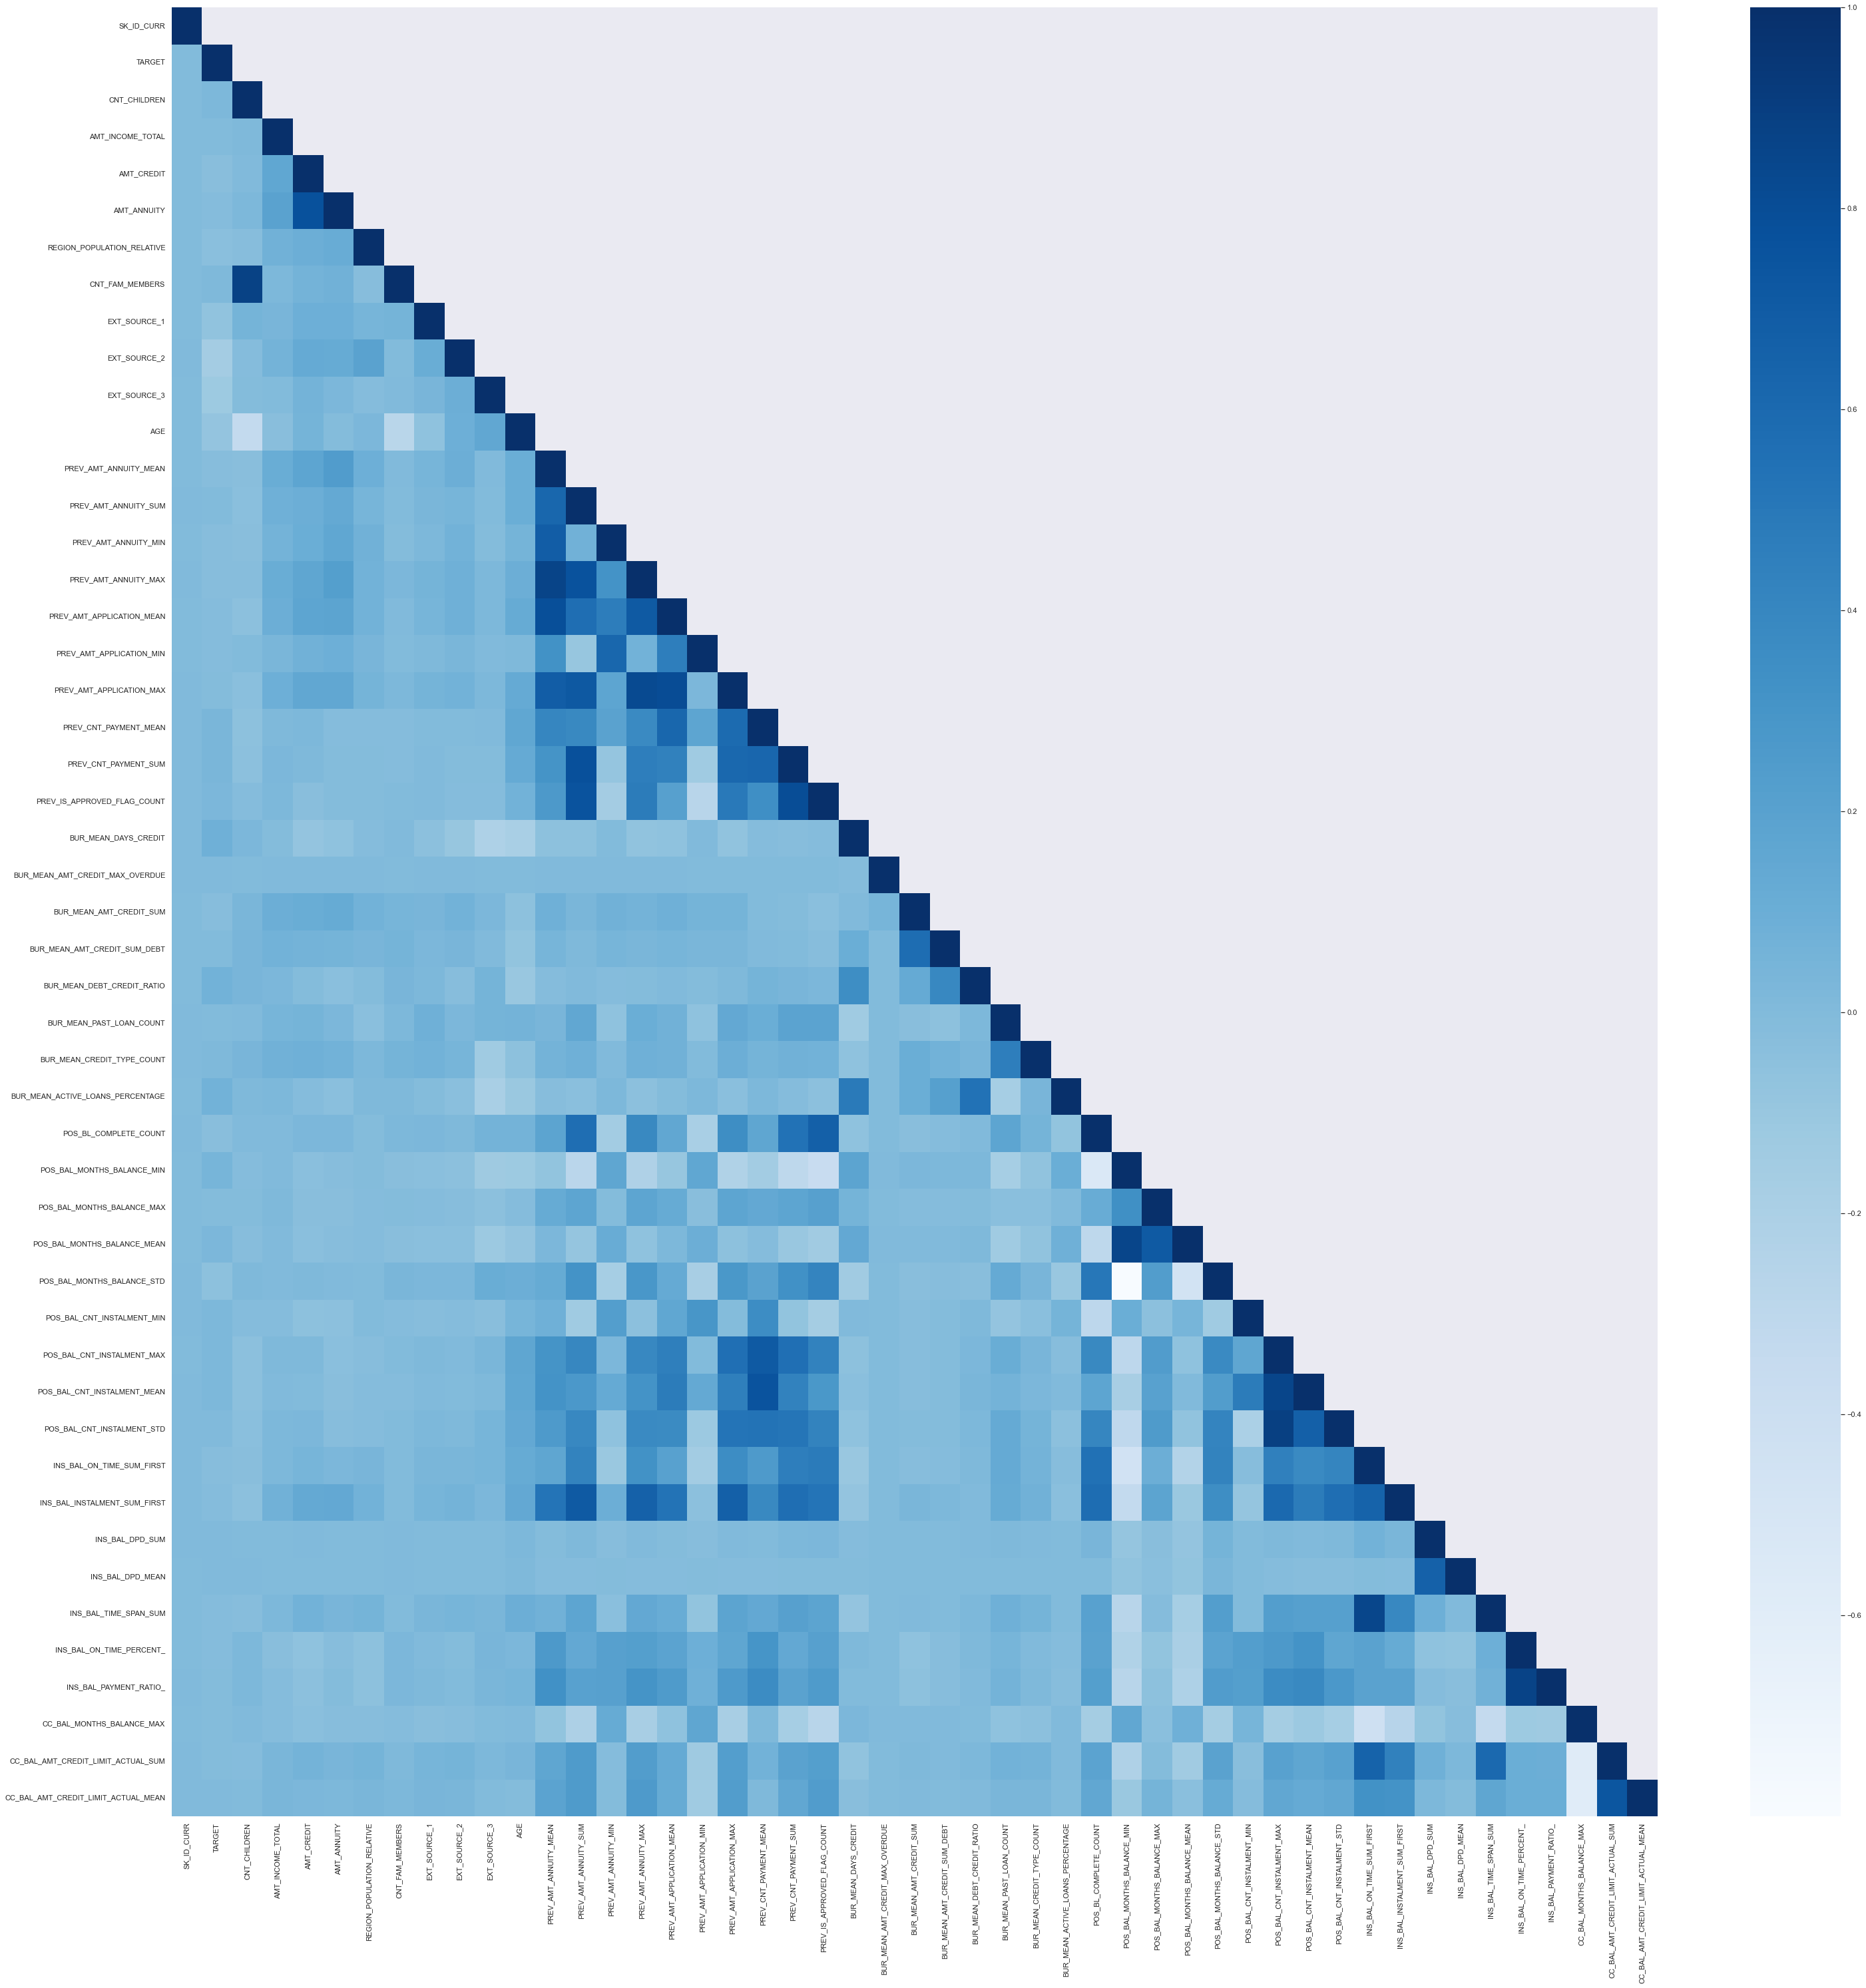

In [22]:
numeric_df = df_merged_final._get_numeric_data()
corr = numeric_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(50,50))
sns.heatmap(corr, mask= mask, cmap= 'Blues')

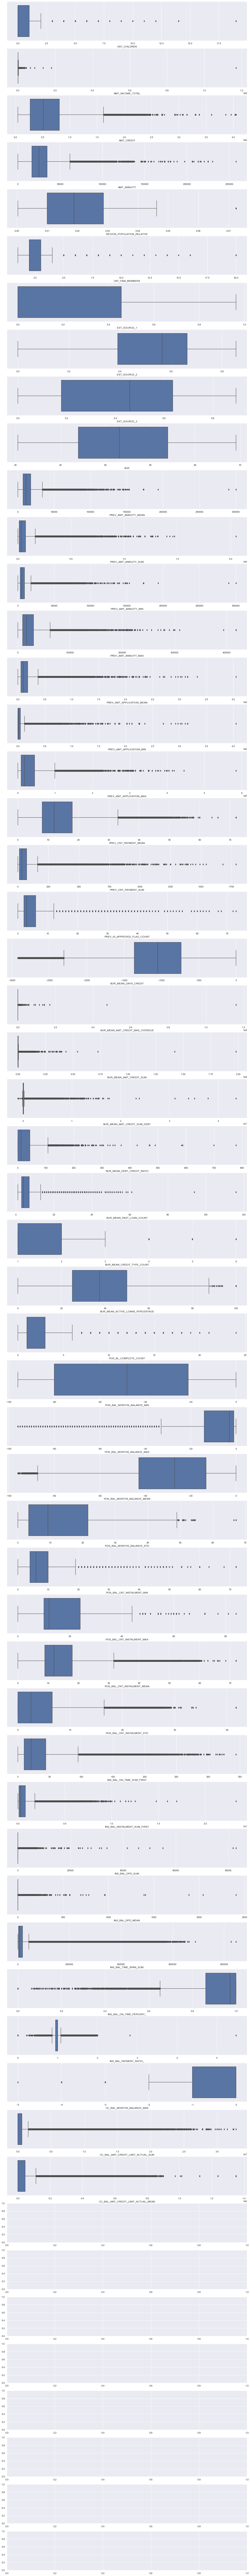

In [23]:
fig, ax = plt.subplots(55,1,figsize=(20, 4 * 55))
for i,j in enumerate(numeric_df.columns[2:]):
    sns.boxplot(df_merged_final[j], ax= ax[i])

In [24]:
def lower_bound(name_column):
    IQR = df_merged_final[name_column].quantile(0.75) - df_merged_final[name_column].quantile(0.25)
    lower_bridge= df_merged_final[name_column].quantile(0.25)-(IQR * 1.5)
    return lower_bridge

def upper_bound(name_column):
    IQR = df_merged_final[name_column].quantile(0.75) - df_merged_final[name_column].quantile(0.25)
    upper_bridge= df_merged_final[name_column].quantile(0.75) + (IQR * 1.5)
    return upper_bridge

def replace_max(name_column):
    q3 = upper_bound(name_column)
    df_merged_final.loc[df_merged_final[name_column] >= q3, name_column] = q3

def replace_min(name_column):
    q1 = lower_bound(name_column)
    df_merged_final.loc[df_merged_final[name_column] <= q1, name_column] = q1

In [25]:
for i in ['AMT_ANNUITY','BUR_MEAN_DEBT_CREDIT_RATIO','BUR_MEAN_ACTIVE_LOANS_PERCENTAGE',
         'POS_BAL_MONTHS_BALANCE_STD','POS_BAL_CNT_INSTALMENT_MIN','POS_BAL_CNT_INSTALMENT_MAX',
         'POS_BAL_CNT_INSTALMENT_MEAN','POS_BAL_CNT_INSTALMENT_STD','INS_BAL_ON_TIME_SUM_FIRST',
         'INS_BAL_INSTALMENT_SUM_FIRST','INS_BAL_TIME_SPAN_SUM','INS_BAL_PAYMENT_RATIO_',
         'PREV_CNT_PAYMENT_SUM','PREV_AMT_APPLICATION_MAX','PREV_AMT_APPLICATION_MIN',
         'PREV_AMT_APPLICATION_MEAN','PREV_AMT_ANNUITY_MAX','PREV_AMT_ANNUITY_MIN',
         'PREV_AMT_ANNUITY_SUM','PREV_AMT_ANNUITY_MEAN','REGION_POPULATION_RELATIVE',
         "AMT_CREDIT",'AMT_INCOME_TOTAL']:
    replace_max(i)

In [26]:
for i in ['BUR_MEAN_DAYS_CREDIT','POS_BAL_MONTHS_BALANCE_MAX','POS_BAL_MONTHS_BALANCE_MEAN',
         'INS_BAL_ON_TIME_PERCENT_','INS_BAL_PAYMENT_RATIO_','PREV_CNT_PAYMENT_SUM']:
    replace_min(i)

In [27]:
numeric_df = df_merged_final._get_numeric_data()
numeric_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,INS_BAL_ON_TIME_SUM_FIRST,INS_BAL_INSTALMENT_SUM_FIRST,INS_BAL_DPD_SUM,INS_BAL_DPD_MEAN,INS_BAL_TIME_SPAN_SUM,INS_BAL_ON_TIME_PERCENT_,INS_BAL_PAYMENT_RATIO_,CC_BAL_MONTHS_BALANCE_MAX,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_SUM,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MEAN
0,100002,1,0,202500.0,406597.5,24700.5,0.018801,1.0,0.083037,0.262949,...,19,2.196257e+05,0.0,0.000000,10260.0,1.000000,1.000000,0.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,0.003541,2.0,0.311267,0.622246,...,25,1.618865e+06,0.0,0.000000,6120.0,1.000000,1.000000,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,0.010032,1.0,0.000000,0.555912,...,3,2.128847e+04,0.0,0.000000,180.0,1.000000,1.000000,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,0.008019,2.0,0.000000,0.650442,...,16,1.007153e+06,0.0,0.000000,3300.0,1.000000,1.000000,-1.0,1620000.0,270000.0
4,100007,0,0,121500.0,513000.0,21865.5,0.028663,1.0,0.000000,0.322738,...,50,8.359853e+05,63.0,0.954545,23730.0,0.757576,0.964285,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0,0,157500.0,254700.0,27558.0,0.032561,1.0,0.145570,0.681632,...,7,5.245047e+04,0.0,0.000000,1260.0,1.000000,1.000000,0.0,0.0,0.0
307503,456252,0,0,72000.0,269550.0,12001.5,0.025164,1.0,0.000000,0.115992,...,5,6.041921e+04,3.0,0.500000,900.0,0.833333,1.000000,0.0,0.0,0.0
307504,456253,0,0,153000.0,677664.0,29979.0,0.005002,1.0,0.744026,0.535722,...,13,6.159591e+04,9.0,0.642857,1530.0,0.928571,0.935497,0.0,0.0,0.0
307505,456254,1,0,171000.0,370107.0,20205.0,0.005313,2.0,0.000000,0.514163,...,19,1.945568e+05,0.0,0.000000,4860.0,1.000000,1.000000,0.0,0.0,0.0


In [28]:
cat_cols = [col for col in df_merged_final.columns if col not in numeric_df.columns]
cat_cols

['CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'INS_BAL_INS_ON_TIME_GRADE_',
 'INS_BAL_PAYMENT_GRADE_']

In [29]:
df_merged_final[cat_cols]

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,ORGANIZATION_TYPE,INS_BAL_INS_ON_TIME_GRADE_,INS_BAL_PAYMENT_GRADE_
0,M,Working,Secondary / secondary special,Single / not married,Laborers,Business Entity Type 3,Good,Good
1,F,State servant,Higher education,Married,Core staff,School,Good,Good
2,M,Working,Secondary / secondary special,Single / not married,Laborers,Government,Good,Good
3,F,Working,Secondary / secondary special,Civil marriage,Laborers,Business Entity Type 3,Good,Good
4,M,Working,Secondary / secondary special,Single / not married,Core staff,Religion,Sub_Par,Good
...,...,...,...,...,...,...,...,...
307502,M,Working,Secondary / secondary special,Separated,Sales staff,Services,Good,Good
307503,F,Pensioner,Secondary / secondary special,Widow,Unknown,XNA,Par,Good
307504,F,Working,Higher education,Separated,Managers,School,Good,Good
307505,F,Commercial associate,Secondary / secondary special,Married,Laborers,Business Entity Type 1,Good,Good


In [30]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ordinal_encoder = OrdinalEncoder
one_hot_encoder = OneHotEncoder

X_ordinal = df_merged_final[['INS_BAL_INS_ON_TIME_GRADE_','INS_BAL_PAYMENT_GRADE_']]
X_one_hot = df_merged_final[[ 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', ]]
y = df_merged_final["TARGET"]

X_ordinal = OrdinalEncoder().fit_transform(X_ordinal)
X_one_hot = OneHotEncoder().fit_transform(X_one_hot)

In [31]:
X_ordinal = pd.DataFrame(X_ordinal)
X_ordinal

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,3.0,0.0
...,...,...
307502,0.0,0.0
307503,1.0,0.0
307504,0.0,0.0
307505,0.0,0.0


In [32]:
X_one_hot = X_one_hot.toarray()
X_one_hot = pd.DataFrame(X_one_hot)
X_one_hot

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
307503,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
307504,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_cat = pd.concat([X_ordinal, X_one_hot], axis= 1)
X_cat

,0,1,0,1,2,3,4,5,6,7,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
307503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
307504,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307505,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.feature_selection import SelectKBest, chi2

X_cat_use = SelectKBest(chi2, k = 10).fit_transform(X_cat, y)
X_cat_use= pd.DataFrame(X_cat_use)
X_cat_use

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
307502,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
307503,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
307504,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
307505,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [35]:
from sklearn.preprocessing import MinMaxScaler

X_num = numeric_df.drop(["SK_ID_CURR", "TARGET"], axis=1 )

scaler = MinMaxScaler()
X_num = scaler.fit_transform(X_num)
X_num = pd.DataFrame(X_num)
X_num

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.0,0.567100,0.230079,0.400306,0.328451,0.000000,0.086255,0.307542,0.155552,0.111161,...,0.200000,0.120740,0.000000,0.000000,0.238411,1.000000,0.625000,1.0,0.000000,0.0
1,0.0,0.783550,0.794402,0.578544,0.057684,0.052632,0.323330,0.727773,0.000000,0.522886,...,0.263158,0.889980,0.000000,0.000000,0.142210,1.000000,0.625000,1.0,0.000000,0.0
2,0.0,0.134199,0.057266,0.109393,0.172858,0.000000,0.000000,0.650190,0.814240,0.651466,...,0.031579,0.011703,0.000000,0.000000,0.004183,1.000000,0.625000,1.0,0.000000,0.0
3,0.0,0.350649,0.170322,0.481111,0.137140,0.052632,0.000000,0.760751,0.000000,0.649154,...,0.168421,0.553688,0.000000,0.000000,0.076682,1.000000,0.625000,0.8,0.049315,0.2
4,0.0,0.307359,0.297781,0.354361,0.503438,0.000000,0.000000,0.377472,0.000000,0.701409,...,0.526316,0.459588,0.000759,0.000397,0.551412,0.303581,0.462725,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0.0,0.422799,0.133429,0.446616,0.572602,0.000000,0.151212,0.797231,0.000000,0.103608,...,0.073684,0.028835,0.000000,0.000000,0.029278,1.000000,0.625000,1.0,0.000000,0.0
307503,0.0,0.148629,0.142878,0.194501,0.441353,0.000000,0.000000,0.135663,0.000000,0.748929,...,0.052632,0.033216,0.000036,0.000208,0.020913,0.521212,0.625000,1.0,0.000000,0.0
307504,0.0,0.408369,0.402554,0.485852,0.083608,0.000000,0.772860,0.626575,0.244260,0.421477,...,0.136842,0.033863,0.000108,0.000267,0.035552,0.794805,0.331926,1.0,0.000000,0.0
307505,0.0,0.466089,0.206860,0.327450,0.089126,0.052632,0.000000,0.601360,0.737742,0.252086,...,0.200000,0.106959,0.000000,0.000000,0.112931,1.000000,0.625000,1.0,0.000000,0.0


In [36]:
from sklearn.feature_selection import f_classif
X_num_use = SelectKBest(f_classif, k = 30).fit_transform(X_num, y)
X_num_use = pd.DataFrame(X_num_use)
X_num_use

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.567100,0.230079,0.328451,0.086255,0.307542,0.155552,0.111161,0.273345,0.510478,...,0.000000,0.802083,0.885458,0.114820,1.000000,0.757576,0.200000,0.120740,1.000000,0.625000
1,0.0,0.783550,0.794402,0.057684,0.323330,0.727773,0.000000,0.522886,1.000000,0.371739,...,0.083333,0.197917,0.498470,0.502760,0.315789,0.319039,0.263158,0.889980,1.000000,0.625000
2,0.0,0.134199,0.057266,0.172858,0.000000,0.650190,0.814240,0.651466,0.158281,0.295593,...,0.041667,0.718750,0.707918,0.026342,0.157895,0.118371,0.031579,0.011703,1.000000,0.625000
3,0.0,0.350649,0.170322,0.137140,0.000000,0.760751,0.000000,0.649154,0.698777,0.136998,...,0.083333,0.791667,0.889822,0.124025,0.052632,0.378788,0.168421,0.553688,1.000000,0.625000
4,0.0,0.307359,0.297781,0.503438,0.000000,0.377472,0.000000,0.701409,0.362779,0.101209,...,0.125000,0.197917,0.614722,0.460909,0.526316,0.484007,0.526316,0.459588,0.303581,0.462725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0.0,0.422799,0.133429,0.572602,0.151212,0.797231,0.000000,0.103608,0.195172,0.364489,...,0.041667,0.906250,0.942729,0.055879,0.368421,0.248580,0.073684,0.028835,1.000000,0.625000
307503,0.0,0.148629,0.142878,0.441353,0.000000,0.135663,0.000000,0.748929,0.297651,0.555871,...,0.041667,0.145833,0.095118,0.044078,0.315789,0.189394,0.052632,0.033216,0.521212,0.625000
307504,0.0,0.408369,0.402554,0.083608,0.772860,0.626575,0.244260,0.421477,0.140942,0.219220,...,0.083333,0.000000,0.092423,0.341237,0.210526,0.211676,0.136842,0.033863,0.794805,0.331926
307505,0.0,0.466089,0.206860,0.089126,0.000000,0.601360,0.737742,0.252086,0.315575,0.126709,...,0.000000,0.885417,0.936429,0.061915,0.736842,0.470328,0.200000,0.106959,1.000000,0.625000


In [37]:
X_train = pd.concat([y,X_num_use, X_cat_use], axis= 1)
X_train

,TARGET,0,1,2,3,4,5,6,7,8,...,0,1,2,3,4,5,6,7,8,9
0,1,0.0,0.567100,0.230079,0.328451,0.086255,0.307542,0.155552,0.111161,0.273345,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0.0,0.783550,0.794402,0.057684,0.323330,0.727773,0.000000,0.522886,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.134199,0.057266,0.172858,0.000000,0.650190,0.814240,0.651466,0.158281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0.0,0.350649,0.170322,0.137140,0.000000,0.760751,0.000000,0.649154,0.698777,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0.0,0.307359,0.297781,0.503438,0.000000,0.377472,0.000000,0.701409,0.362779,...,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,0.0,0.422799,0.133429,0.572602,0.151212,0.797231,0.000000,0.103608,0.195172,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
307503,0,0.0,0.148629,0.142878,0.441353,0.000000,0.135663,0.000000,0.748929,0.297651,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
307504,0,0.0,0.408369,0.402554,0.083608,0.772860,0.626575,0.244260,0.421477,0.140942,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
307505,1,0.0,0.466089,0.206860,0.089126,0.000000,0.601360,0.737742,0.252086,0.315575,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [38]:
X_train.to_csv("data_preprocessed\\X_train.csv", index= False)